In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from random import seed,sample
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


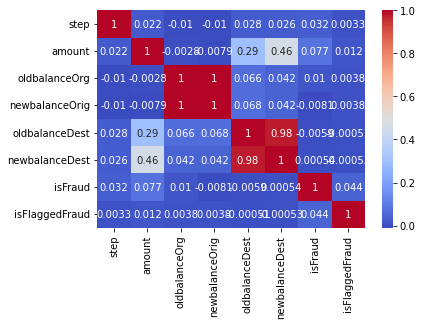

In [8]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [9]:
#sns.pairplot(df)

In [10]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
type = df['type'].value_counts()
transaction = type.index
count = type.values
count

array([2237500, 2151495, 1399284,  532909,   41432])

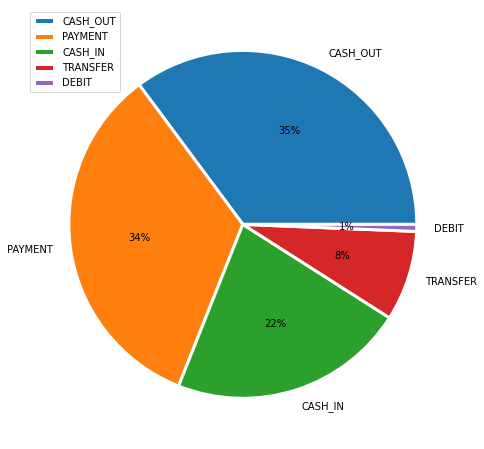

In [12]:
type = df['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
colors = ( "tab:blue","tab:purple","tab:red","tab:green","tab:orange")
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()


In [13]:
fraud = df[df["isFraud"] == 1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [14]:
type = fraud['type'].value_counts()
transaction = type.index
count = type.values
count

array([4116, 4097])

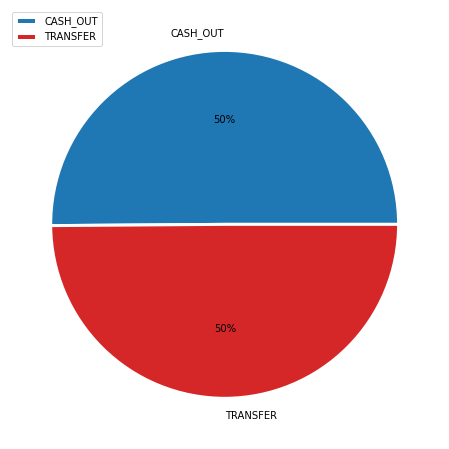

In [15]:
type = fraud['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
colors = ( "tab:blue","tab:red")
plt.figure(figsize=(8,8))
plt.pie(count, colors=colors, labels=transaction, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Amount of Transaction')

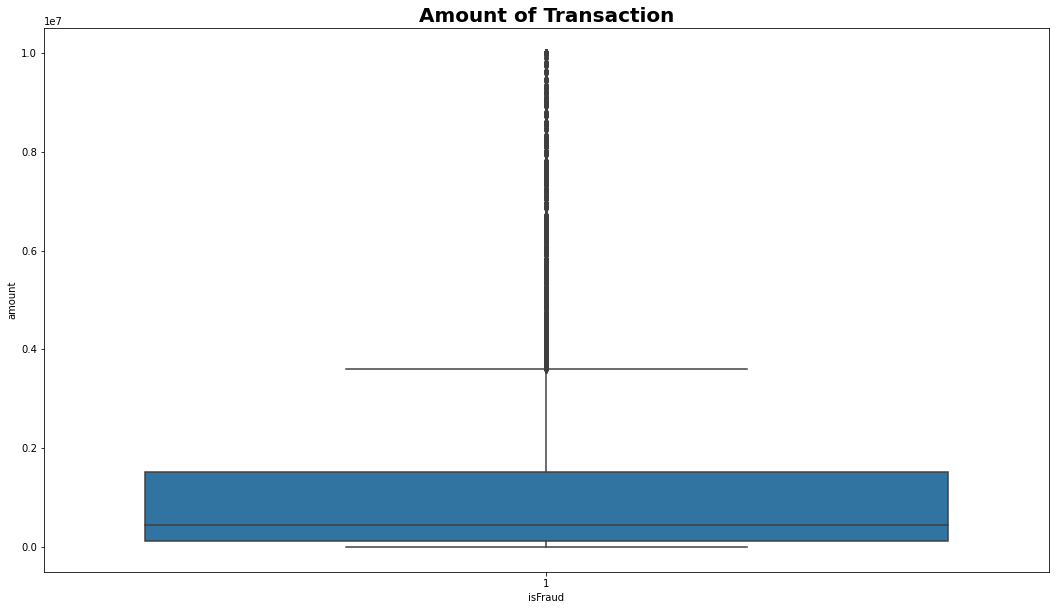

In [16]:
plt.figure(figsize=(18, 10))
sns.boxplot(x = 'isFraud', y = 'amount', data = fraud)
plt.title('Amount of Transaction',fontweight="bold", size=20)

In [17]:
fraud['amount'].describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [18]:
Q1 = fraud['amount'].quantile(0.25)
Q3 = fraud['amount'].quantile(0.75)
IQR = Q3 - Q1

filter = (fraud['amount'] >= Q1 - 1.5 * IQR) & (fraud['amount'] <= Q3 + 1.5 * IQR)
fraud = fraud.loc[filter]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


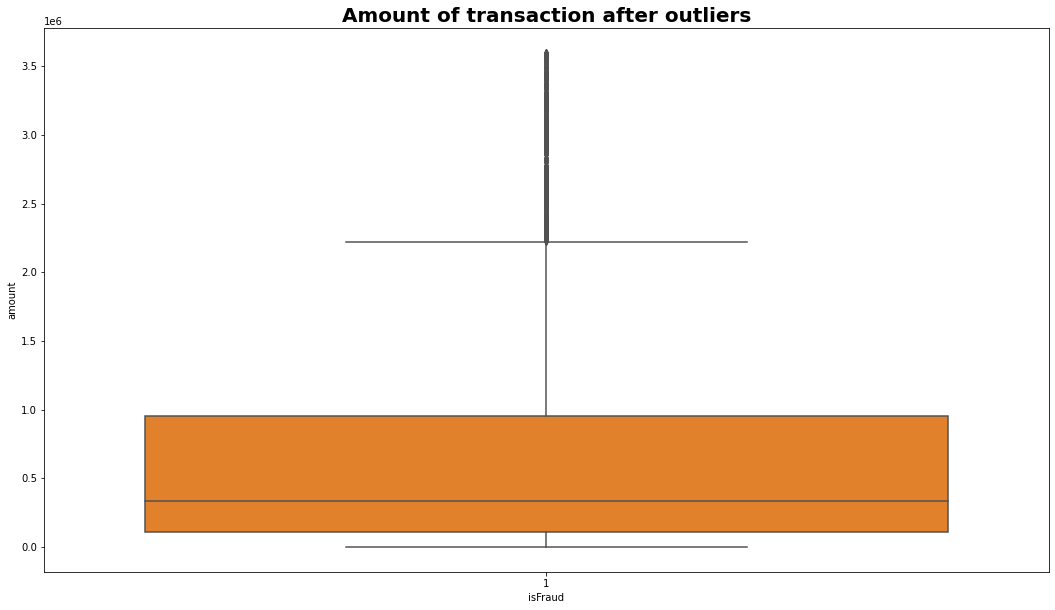

In [19]:
plt.figure(figsize=(18, 10))
sns.boxplot(x = 'isFraud',y = 'amount', data = fraud, color="tab:orange")
plt.title('Amount of transaction after outliers',fontweight="bold", size=20);

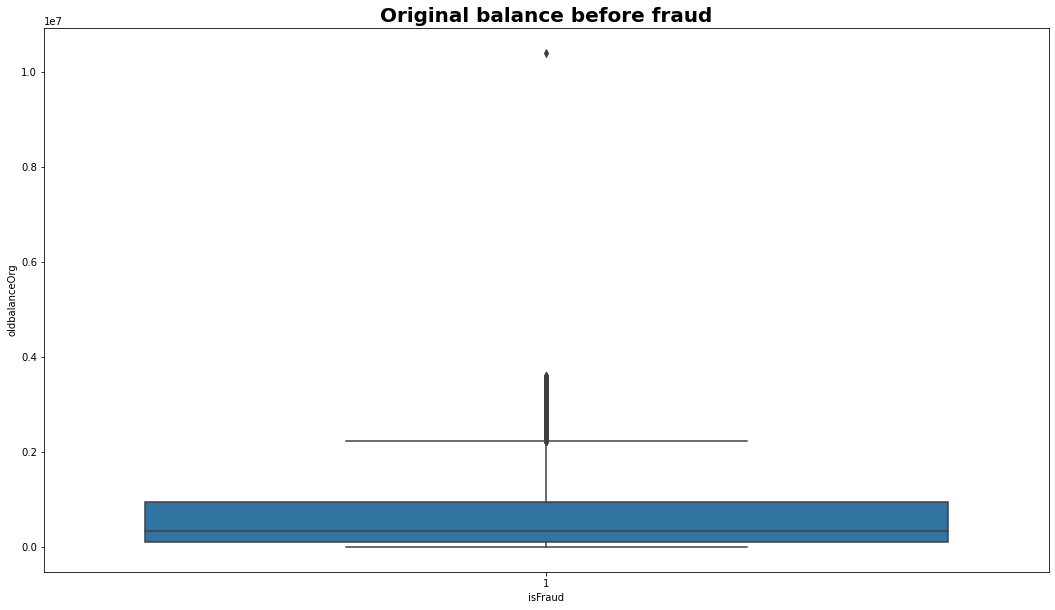

In [20]:
plt.figure(figsize=(18, 10))
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = fraud)
plt.title('Original balance before fraud',fontweight="bold", size=20);

In [21]:
not_fraud = df[df["isFraud"] == 0]
not_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


Text(0.5, 1.0, 'Original balance when no fraud happen')

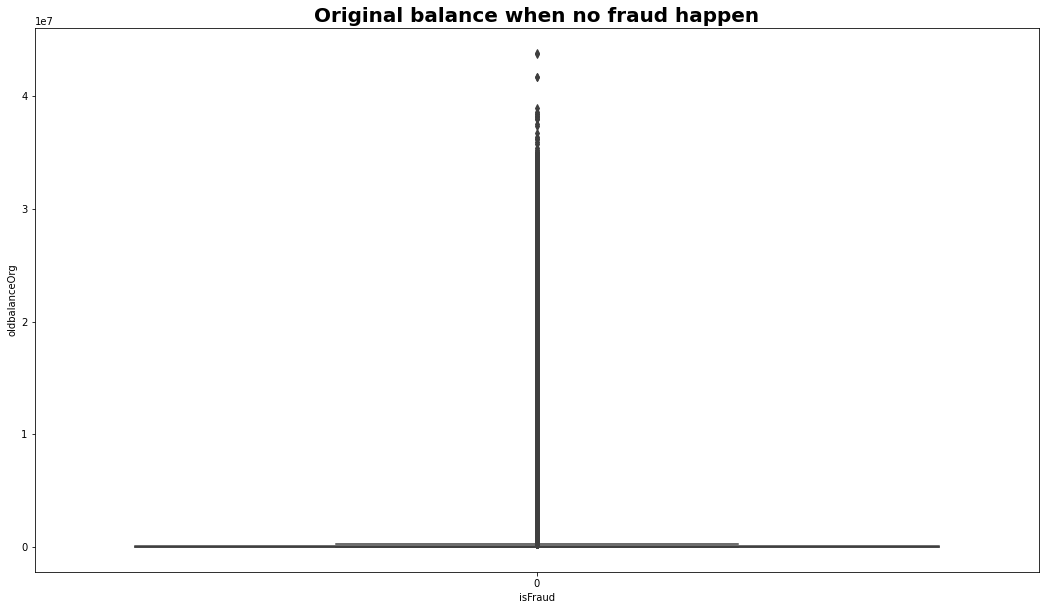

In [22]:
plt.figure(figsize=(18, 10))
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = not_fraud)
plt.title('Original balance when no fraud happen',fontweight="bold", size=20)

In [23]:
data = df.copy()

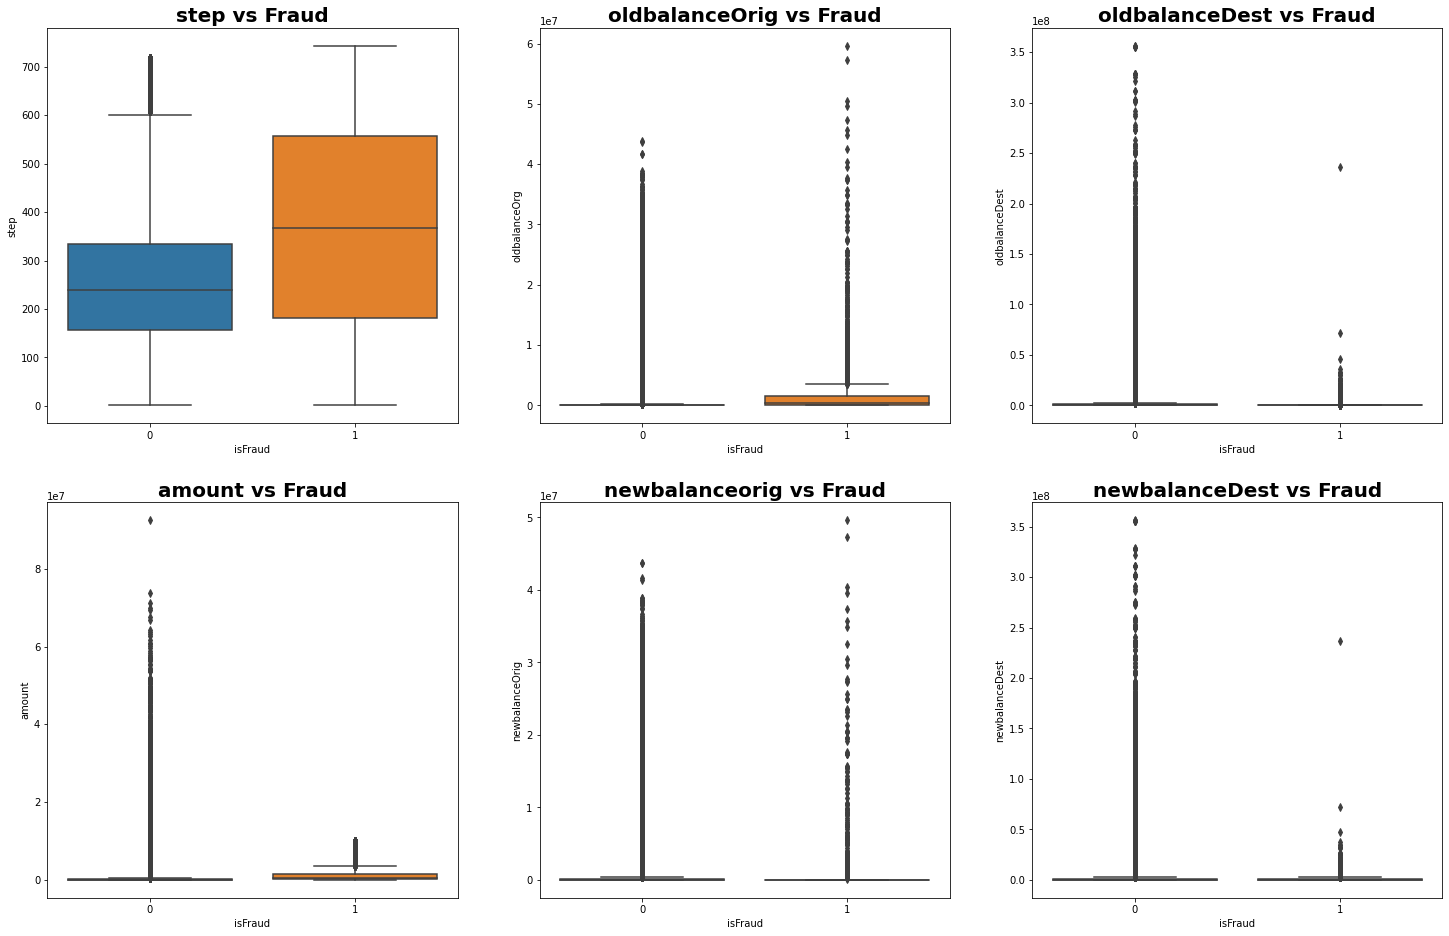

In [24]:
plt.figure(figsize=(25, 16))

plt.subplot(2,3,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data)
plt.title('step vs Fraud',fontweight="bold", size=20)

plt.subplot(2,3,2)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data)
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)

plt.subplot(2,3,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data)
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20);

plt.subplot(2,3,4)
sns.boxplot(x = 'isFraud', y = 'amount', data = data)
plt.title('amount vs Fraud',fontweight="bold", size=20)

plt.subplot(2,3,5)
sns.boxplot(x = 'isFraud', y = 'newbalanceOrig', data = data)
plt.title('newbalanceorig vs Fraud',fontweight="bold", size=20);

plt.subplot(2,3,6)
sns.boxplot(x = 'isFraud', y = 'newbalanceDest', data = data)
plt.title('newbalanceDest vs Fraud',fontweight="bold", size=20);

In [25]:
data["Type2"] = np.nan # initializing feature column

# filling feature column
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'),"Type2"] = "CC" 
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'),"Type2"] = "CM"
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'),"Type2"] = "MC"
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'),"Type2"] = "MM"

In [26]:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

In [27]:
print("Fraud transactions by type1:\n",fraud.Type2.value_counts())
print("\n Valid transactions by type1:\n",valid.Type2.value_counts())

Fraud transactions by type1:
 CC    8213
Name: Type2, dtype: int64

 Valid transactions by type1:
 CC    4202912
CM    2151495
Name: Type2, dtype: int64


In [28]:
a1 = valid.Type2.value_counts()
count = a1.values
transaction = a1.index

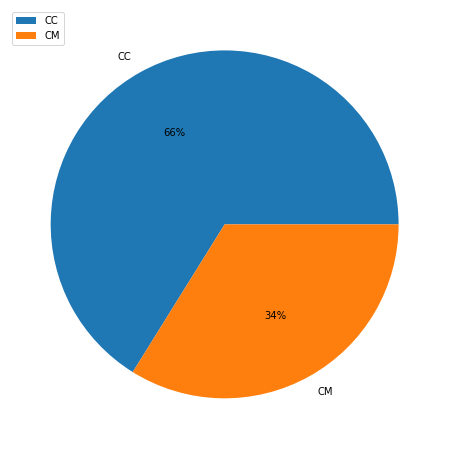

In [29]:
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()


In [30]:
# df1 = pd.read_csv('Final.csv')
# df1.head()

In [31]:
# df1=df1.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
# df1.head()

In [32]:
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [33]:
df_new = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
#df_new = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
randomState = 5
np.random.seed(randomState)
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [34]:
df_new["errorbalanceOrg"] = df_new.newbalanceOrig + df_new.amount - df_new.oldbalanceOrg
df_new["errorbalanceDest"] = df_new.oldbalanceDest + df_new.amount - df_new.newbalanceDest

/var/folders/m4/yx3n91cs37nf91mrrvjx9s2r0000gn/T/ipykernel_29596/3749051713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["errorbalanceOrg"] = df_new.newbalanceOrig + df_new.amount - df_new.oldbalanceOrg
/var/folders/m4/yx3n91cs37nf91mrrvjx9s2r0000gn/T/ipykernel_29596/3749051713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["errorbalanceDest"] = df_new.oldbalanceDest + df_new.amount - df_new.newbalanceDest


In [35]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0.00,1.810000e+02
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0.00,8.500025e+05


In [36]:
dataset = pd.get_dummies(df_new,prefix=['type'])
dataset

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.00,0.0,0.00,0.00,1,0.00,1.810000e+02,0,1
3,1,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04,1,0
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05,1,0
19,1,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05,0,1
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00,1,0
6362616,743,6311409.28,6311409.28,0.0,0.00,0.00,1,0.00,6.311409e+06,0,1
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02,1,0
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1,0.00,8.500025e+05,0,1


In [37]:
seed(21)

X = dataset.drop("isFraud",1)
Y = dataset.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/var/folders/m4/yx3n91cs37nf91mrrvjx9s2r0000gn/T/ipykernel_29596/3656432343.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop("isFraud",1)


In [38]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1856174, 10)
Shape of X_test:  (914235, 10)


In [39]:
print('fruad ',fraud.shape)
print('Valid', valid.shape)

fruad  (8213, 12)
Valid (6354407, 12)


In [40]:
# Train model
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(X_train, y_train)
 
# Predict on testing set
predictionsDT = DT.predict(X_test)
 
     
# Evaluating model
CM_DT = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

resultsDT = {"Confusion Matrix":CM_DT,"Classification Report":CR_DT,"Area Under Curve":AUC_DT}

# showing results from Random Forest

for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])

Confusion Matrix : 
 [[911469     19]
 [    11   2736]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    911488
           1       0.99      1.00      0.99      2747

    accuracy                           1.00    914235
   macro avg       1.00      1.00      1.00    914235
weighted avg       1.00      1.00      1.00    914235

Area Under Curve : 
 0.9979873932811487


In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[Text(0.5590479651162791, 0.9782608695652174, 'X[2] <= 1240703.062\ngini = 0.006\nsamples = 2770409\nvalue = [2762196, 8213]'),
 Text(0.28088662790697677, 0.9347826086956522, 'X[5] <= 0.695\ngini = 0.004\nsamples = 2765903\nvalue = [2760073, 5830]'),
 Text(0.15038759689922482, 0.8913043478260869, 'X[9] <= 0.5\ngini = 0.306\nsamples = 15349\nvalue = [12453, 2896]'),
 Text(0.06511627906976744, 0.8478260869565217, 'X[7] <= 0.185\ngini = 0.004\nsamples = 11376\nvalue = [11353, 23]'),
 Text(0.05271317829457364, 0.8043478260869565, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.07751937984496124, 0.8043478260869565, 'X[0] <= 6.5\ngini = 0.003\nsamples = 11370\nvalue = [11353, 17]'),
 Text(0.037209302325581395, 0.7608695652173914, 'X[6] <= 1392.905\ngini = 0.153\nsamples = 48\nvalue = [44, 4]'),
 Text(0.024806201550387597, 0.717391304347826, 'X[2] <= 97704.422\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.012403100775193798, 0.6739130434782609, 'gini = 0.0\nsamples = 4\nvalue = [

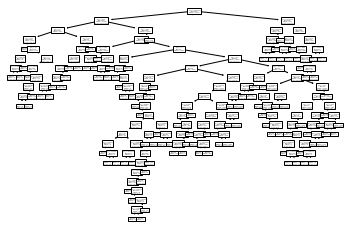

In [42]:
tree.plot_tree(clf)